In [2]:
# imports
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from itertools import islice
import statsmodels.api as sm
from os import listdir
from os.path import isfile, join
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
# import statistics
import itertools
import pandas as pd
#font for plots
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


In [229]:
import os, datetime, math, random

# os.environ["SPARK_HOME"] = "/Users/Karim/src/spark-2.0.0-bin-hadoop2.6"
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python"

from KernelDensity import KernelDensity
from sklearn.linear_model import LinearRegression
from scipy import stats
from pyspark import SparkContext
from pyspark.rdd import RDD

In [89]:
try:
    sc.stop()
except:
    print("can't stop sparkcontext") 
sc = SparkContext(appName="VaR")
spark = SparkSession(sparkContext=sc)

In [ ]:
# rdd = sc.wholeTextFiles("data/stockt/*")

# def appender(x):
    
#     return x

# frdd = rdd.flatMap(appender)

In [61]:
df = spark.read.format("com.databricks.spark.csv").option("header", "true").load("data/factors/*.csv")

In [62]:
len(df.collect())

21106

In [48]:
df = spark.read.option("header", "true").csv("data/factors/*.csv")

In [63]:
len(df.select('Date', 'Open').collect())

21106

In [64]:
lines = sc.textFile('spark/spark/data/baby_names_beginning_2007.csv')


In [67]:
#returns total number of characters
rdd = lines.map(lambda s: len(s))
rdd = rdd.map(lambda s: 2*s)
print(rdd.collect())
print(rdd.reduce( lambda a,b: a+b))

[64, 52, 50, 48, 50, 52, 54, 42, 50, 40, 42, 54, 60, 44, 52, 50, 50, 48, 50, 40, 52, 48, 50, 52, 56, 50, 44, 44, 50, 50, 50, 44, 46, 52, 48, 52, 52, 46, 46, 40, 42, 48, 40, 42, 40, 42, 42, 42, 46, 50, 48, 50, 52, 54, 48, 46, 48, 48, 48, 52, 48, 40, 42, 52, 42, 54, 50, 48, 48, 54, 58, 52, 52, 46, 46, 46, 48, 46, 44, 42, 46, 52, 46, 46, 46, 48, 42, 44, 44, 46, 46, 46, 46, 44, 52, 50, 50, 54, 50, 52, 50, 50, 54, 44, 48, 58, 52, 48, 56, 46, 52, 46, 54, 40, 42, 44, 46, 48, 54, 54, 60, 54, 44, 50, 50, 48, 42, 42, 44, 46, 44, 56, 52, 44, 42, 44, 46, 50, 52, 44, 44, 48, 52, 44, 50, 50, 54, 52, 44, 48, 54, 44, 38, 42, 44, 40, 42, 44, 48, 42, 50, 50, 44, 48, 52, 48, 46, 46, 44, 56, 52, 56, 56, 50, 48, 44, 52, 48, 48, 50, 50, 50, 50, 46, 56, 46, 48, 50, 52, 54, 46, 50, 50, 52, 46, 46, 54, 52, 48, 44, 46, 50, 52, 44, 44, 48, 42, 44, 40, 46, 46, 42, 46, 44, 42, 44, 40, 46, 42, 44, 44, 46, 46, 44, 44, 46, 48, 44, 44, 46, 44, 44, 42, 42, 42, 42, 48, 44, 44, 42, 48, 44, 44, 48, 42, 44, 48, 46, 40, 52,

In [17]:
files  = os.listdir('data/stockt/')
frdd = sc.parallelize(files)

In [83]:
def readf(file):
    return sc.parallelize([1,2,3],2)


In [84]:
rdd = frdd.map(lambda f: readf(f))

In [85]:
rdd.collect()

Traceback (most recent call last):
  File "/opt/spark/python/pyspark/serializers.py", line 590, in dumps
    return cloudpickle.dumps(obj, 2)
  File "/opt/spark/python/pyspark/cloudpickle.py", line 863, in dumps
    cp.dump(obj)
  File "/opt/spark/python/pyspark/cloudpickle.py", line 260, in dump
    return Pickler.dump(self, obj)
  File "/usr/lib/python2.7/pickle.py", line 224, in dump
    self.save(obj)
  File "/usr/lib/python2.7/pickle.py", line 286, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python2.7/pickle.py", line 568, in save_tuple
    save(element)
  File "/usr/lib/python2.7/pickle.py", line 286, in save
    f(self, obj) # Call unbound method with explicit self
  File "/opt/spark/python/pyspark/cloudpickle.py", line 406, in save_function
    self.save_function_tuple(obj)
  File "/opt/spark/python/pyspark/cloudpickle.py", line 549, in save_function_tuple
    save(state)
  File "/usr/lib/python2.7/pickle.py", line 286, in save
    f(self,

PicklingError: Could not serialize object: Exception: It appears that you are attempting to reference SparkContext from a broadcast variable, action, or transformation. SparkContext can only be used on the driver, not in code that it run on workers. For more information, see SPARK-5063.

In [82]:
sc.textFile('spark/spark/data/baby_names_beginning_2007.csv').collect()

[u'Year,First Name,County,Sex,Count',
 u'2013,GAVIN,ST LAWRENCE,M,9',
 u'2013,LEVI,ST LAWRENCE,M,9',
 u'2013,LOGAN,NEW YORK,M,44',
 u'2013,HUDSON,NEW YORK,M,49',
 u'2013,GABRIEL,NEW YORK,M,50',
 u'2013,THEODORE,NEW YORK,M,51',
 u'2013,ELIZA,KINGS,F,16',
 u'2013,MADELEINE,KINGS,F,16',
 u'2013,ZARA,KINGS,F,16',
 u'2013,DAISY,KINGS,F,16',
 u'2013,JONATHAN,NEW YORK,M,51',
 u'2013,CHRISTOPHER,NEW YORK,M,52',
 u'2013,LUKE,SUFFOLK,M,49',
 u'2013,JACKSON,NEW YORK,M,53',
 u'2013,JACKSON,SUFFOLK,M,49',
 u'2013,JOSHUA,NEW YORK,M,53',
 u'2013,AIDEN,NEW YORK,M,53',
 u'2013,BRANDON,SUFFOLK,M,50',
 u'2013,JUDY,KINGS,F,16',
 u'2013,MASON,ST LAWRENCE,M,8',
 u'2013,DAVID,NEW YORK,M,53',
 u'2013,NOAH,ST LAWRENCE,M,8',
 u'2013,AIDEN,ST LAWRENCE,M,8',
 u'2013,SEBASTIAN,NEW YORK,M,57',
 u'2013,SAMUEL,NEW YORK,M,59',
 u'2013,MAX,NEW YORK,M,62',
 u'2013,DEVORA,KINGS,F,16',
 u'2013,OLIVER,NEW YORK,M,66',
 u'2013,JOSEPH,NEW YORK,M,66',
 u'2013,JAYDEN,NEW YORK,M,66',
 u'2013,LEO,NEW YORK,M,67',
 u'2013,JOHN,NEW 

In [39]:
rfrdd.collect()

[8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8]

In [116]:
def readStocksAndFactors(prefix, numData=10):
    start = datetime.date(2008, 10, 23)
    end = datetime.date(2013, 10, 23)
    rawStocks = filter(lambda stock: len(stock) >= 260*5+10,readHistories(prefix + "stocks/", numData))
    trimmedStocks = map(lambda stock: trimToRegion(stock, start, end),rawStocks)
    
    stocks = map(lambda stock: fillInHistory(stock, start, end), trimmedStocks)
    factorsPrefix = prefix + "factors/"
    factors1 = map(lambda file: readInvestingDotComHistory(factorsPrefix + file),["crudeoil.csv", "us30yeartreasurybonds.csv"])
    factors2 = map(lambda file: readYahooHistory(factorsPrefix + file, order='inc'),['GSPC.csv','IXIC.csv'])
    trimmedFactors = map(lambda stock: trimToRegion(stock, start, end), factors1 + factors2)
    factors = map(lambda stock: fillInHistory(stock, start, end), trimmedFactors)
    stockReturns = map(twoWeekReturns, stocks)
    factorReturns = map(twoWeekReturns, factors)
    return (stockReturns, factorReturns)

def readHistories(dir, numData=10, order='des'):
    files = os.listdir(dir)
    return map(lambda f: readYahooHistory(dir+f,order), files[:numData])

def readYahooHistory(file, order='des'):
    with open(file) as f:
        lines = f.readlines()
    try:
        if "html" in lines[0]:
#             print file
            return []
    except:
        pass
        
    def lineMapper(line):
        cols = line.split(',')
        try:
            date = datetime.datetime.strptime(cols[0], '%d-%b-%y').date()
        except:
            date = datetime.datetime.strptime(cols[0], '%Y-%m-%d').date()
        try: 
            value = float(cols[1])
        except:
            value = 0
        return (date, value)

    formattedLines = map(lineMapper, lines[1:])
    if order =='des':
        formattedLines.reverse() # Note: attend on the order of data's time, needed increasing
    formattedLines = [line for line in formattedLines if line[1] !=0]
    return formattedLines

def readInvestingDotComHistory(file, order='des'):
    with open(file) as f:
        lines = f.readlines()[1:]
    def lineMapper(line):
        cols = line.split(',')
        try:
            date = datetime.datetime.strptime(cols[0], '%b %d-%Y').date()
        except:
            date = datetime.datetime.strptime(cols[0], '%b %d-%Y').date()
            
        value = float(cols[1])
        return (date, value)
    formattedLines = map(lineMapper, lines)
    if order=='des':
        formattedLines.reverse()
    return formattedLines

def trimToRegion(history, start, end):
    trimmed = filter(lambda his: his[0] >= start and his[0] <= end, history)
    if(trimmed[0][0] != start):
        trimmed = [(start, trimmed[0][1])] + trimmed
    if (trimmed[-1][0] != end):
        trimmed = trimmed + [(end, trimmed[-1][1])]
    
    return trimmed

def fillInHistory(history, start, end):
    cur = history
    filled = []
    curDate = start
    count_ = 0
    idx = 0
    numEntries = len(history)
    while (curDate < end):
        while idx + 1 < numEntries and cur[idx + 1][0] <= curDate: 
            idx +=1

        filled.append((curDate, cur[idx][1]))

        curDate += datetime.timedelta(days=1)
        # skip weekend
        if (curDate.weekday()+1 > 5):
            curDate += datetime.timedelta(days=2)

    return filled

def twoWeekReturns(history):
    mappedHistory = []
    for (idx, val) in enumerate(history):
        if (idx + 10 <= len(history)):
            window = history[idx: idx + 10]
            next = window[-1][1]
            prev = window[0][1]
            mappedHistory.append((next - prev))# / prev)

    return mappedHistory

In [52]:
# start = datetime.date(2008, 10, 23)
# end = datetime.date(2013, 10, 23)
# (stocksReturns, factorsReturns) = readStocksAndFactors("./data/",100)

(datetime.date(2008, 10, 31), 7.72)
(datetime.date(2008, 10, 29), 8.2)


# Prepare data with RDD spark

In [110]:
# def readStocksAndFactors(prefix, num_data):


def readYahooHistory2(file, order='des'):
    
    def toDateTime(t):
        try:
            date = datetime.datetime.strptime(t, '%d-%b-%y').date()
        except:
            date = datetime.datetime.strptime(t, '%Y-%m-%d').date()
        return date

    df = pd.read_csv(file, index_col=False)
    df = df[['Date', 'Open']]
    df['Date'] = df['Date'].apply(toDateTime)
    df = df[df.Open !='-']
    df['Open'] = df['Open'].apply(lambda x: float(x))
    
    if order =='des':
        df = df[::-1] # Note: attend on the order of data's time, needed increasing
        df.reset_index(drop=True, inplace=True)
    return df.values.tolist()



## Get raw data

In [162]:
prefix='data/'
num_files = 10
stockprefix = prefix + 'stocks/'
files = os.listdir(stockprefix)
filesrdd = sc.parallelize(files[:num_files])
rawstocks = filesrdd.map(lambda f: readYahooHistory2(stockprefix + f))
print('Raw stocks: ',len(rawstocks.collect()))    


('Raw stocks: ', 10)


In [163]:
print(rawstocks.collect()[1])

[[datetime.date(2000, 1, 3), 142.97], [datetime.date(2000, 1, 4), 143.59], [datetime.date(2000, 1, 5), 142.66], [datetime.date(2000, 1, 6), 143.59], [datetime.date(2000, 1, 7), 142.97], [datetime.date(2000, 1, 10), 143.28], [datetime.date(2000, 1, 11), 142.97], [datetime.date(2000, 1, 12), 142.34], [datetime.date(2000, 1, 13), 142.34], [datetime.date(2000, 1, 14), 142.97], [datetime.date(2000, 1, 18), 142.97], [datetime.date(2000, 1, 19), 141.72], [datetime.date(2000, 1, 20), 141.1], [datetime.date(2000, 1, 21), 141.1], [datetime.date(2000, 1, 24), 139.85], [datetime.date(2000, 1, 25), 139.85], [datetime.date(2000, 1, 26), 139.85], [datetime.date(2000, 1, 27), 139.85], [datetime.date(2000, 1, 28), 139.85], [datetime.date(2000, 1, 31), 139.85], [datetime.date(2000, 2, 1), 136.1], [datetime.date(2000, 2, 2), 136.1], [datetime.date(2000, 2, 3), 136.1], [datetime.date(2000, 2, 4), 136.1], [datetime.date(2000, 2, 7), 136.1], [datetime.date(2000, 2, 8), 137.35], [datetime.date(2000, 2, 9), 1

## filter out these stocks that have shorter duration

In [164]:
duration = 260*5+10
stocks = rawstocks.filter(lambda stock: len(stock) >=duration)

In [165]:
len(stocks.collect())

5

## Trim data to specific time

In [166]:
start = datetime.date(2008, 10, 23)
end = datetime.date(2013, 10, 23)

In [167]:
trimmedStocks = stocks.map(lambda stock: trimToRegion(stock, start, end))
print('Number of data after trimming: ',trimmedStocks.count())


('Number of data after trimming: ', 5)


In [168]:
fillStocks = trimmedStocks.map(lambda stock: fillInHistory(stock, start, end))

In [169]:
# print(fillStocks.collect()[2])

In [199]:
stocksReturnsRDD = fillStocks.map(twoWeekReturns) # return data training( time serise with sliding window=2weeks)

In [200]:
stocksReturnsRDD.cache() # cache to mem

PythonRDD[76] at RDD at PythonRDD.scala:53

In [156]:
stocksReturnsRDD.unpersist()

PythonRDD[68] at RDD at PythonRDD.scala:53

## Deal with factors( same as stocks)

In [142]:
factorsPrefix = prefix + "factors/"
# from investing.com
factorRDD1 = sc.parallelize(["crudeoil.csv", "us30yeartreasurybonds.csv"])
factors1 = factorRDD1.map(lambda file: readInvestingDotComHistory(factorsPrefix + file))

#from yahooHistory
factorRDD2 = sc.parallelize(['GSPC.csv','IXIC.csv'])
factors2 = factorRDD2.map(lambda file: readYahooHistory(factorsPrefix + file, order='inc'))


In [146]:
factors = factors2.union(factors1) # concate two dataset of factors

In [147]:
factors.count()

4

In [201]:
trimmedFactors = factors.map(lambda fac: trimToRegion(fac, start, end))
filledFactors = trimmedFactors.map(lambda fa: fillInHistory(fa, start, end))
factorsReturnsRDD = filledFactors.map(twoWeekReturns)

In [202]:
factorsReturns = factorsReturnsRDD.collect()
stocksReturns = stocksReturnsRDD.collect()

# Step 1: Defining relationship between market factors and instrument's returns
 ## Variance- Covariance: 

is the simplest and least computationally intensive method. The model assume that the return of each instrument is normally distributed, which allows deriving a estimate analytically

## Monte Carlo Simulation (MCS)
Monte Carlo simulation is a computerized mathematical technique that can be applied such that it is possible to account for risk in quantitative analysis and decision making. This technique is used in many different fields, such as R&D, risk management, portfolio management, pricing derivatives, strategic planning, project planning, cost modeling and many more.<br>

In general, MCS is a technique <mark style='background-color: yellow'>that "converts" uncertainty on input variables of a model into probability distributions</mark>. By combining the distributions and randomly selecting values from them, it recalculates the simulated model many times, <mark style='background-color: yellow'>to determine the probability of the output</mark>. <br>

 To capture the fact that market factors are often correlated—when NASDAQ is down, the Dow is likely to be suffering as well—we can use a multivariate normal distribution with a nondiagonal
covariance matrix:
<img src='./images/MND.png'>
Sigma: empirical covariance matrix of the return of the factors/


In [179]:
def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

assert (transpose([[1,2,3], [4,5,6], [7,8,9]]) == [[1, 4, 7], [2, 5, 8], [3, 6, 9]]), "Function transpose runs incorrectly"

In [180]:
def featurize(factorReturns):
    squaredReturns = map(lambda x: math.copysign(1, x) * x * x, factorReturns)
    squareRootedReturns = map(lambda x: math.copysign(1,x) * math.sqrt(abs(x)), factorReturns)
    return squaredReturns + squareRootedReturns + factorReturns

# test our function featurize
assert (featurize([4, -9, 25]) == [16, -81, 625, 2, -3, 5, 4, -9, 25]), "Function runs incorrectly"

Using OLS(Odinary Least Square ), estimate the weights for each feature on each stock <br>
Weight dim?

In [181]:
def estimateParams(y, x):
    return sm.OLS(y, x).fit().params

# transpose factorsReturns
factorMat = transpose(factorsReturns) 

# featurize each row of factorMat
factorFeatures = list(map(featurize,factorMat))

# OLS require parameter to be a numpy array
factor_columns = np.array(factorFeatures)

# add a constant - the intercept term for each instrument i.
factor_columns = sm.add_constant(factor_columns, prepend=True) 

# estimate weights
weights = [estimateParams(stockReturns, factor_columns) for stockReturns in stocksReturns] 
print("weights:", np.shape(weights))

('weights:', (5, 13))


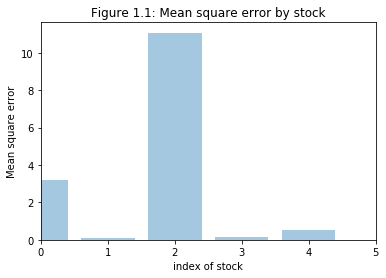

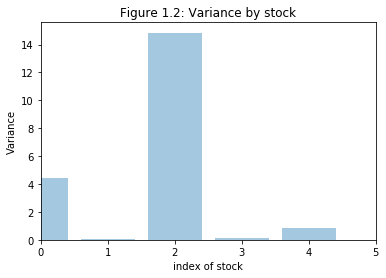

In [182]:
def mean_square(computedValues, realValues):
    zipped = list(zip(computedValues, realValues))
    squares = [(x[0] - x[1])**2 for x in zipped]
    return sum(squares)/len(squares)

def predict(feat, weights): 
    l = [feat[i]*weights[i] for i in range(len(feat))]
    return sum(l)

listOfMeanSquares = []
listOfVariances = []

for i in range(len(weights)):
    
    predictions = map(lambda feat: predict(feat, weights[i]), factor_columns) 
    meanError = mean_square(predictions, stocksReturns[i])
    listOfMeanSquares.append(meanError)
    varianceSquare = np.std(stocksReturns[i])**2
    listOfVariances.append(varianceSquare)
    
plt.bar(range(len(listOfMeanSquares)), listOfMeanSquares, alpha=0.4, align="center")
plt.title("Figure 1.1: Mean square error by stock")
plt.xlabel("index of stock")
plt.ylabel("Mean square error")
plt.xlim(0, len(listOfMeanSquares))
plt.show()
plt.bar(range(len(listOfVariances)), listOfVariances, alpha=0.4, align="center")
plt.title("Figure 1.2: Variance by stock")
plt.xlabel("index of stock")
plt.ylabel("Variance")
plt.xlim(0, len(listOfVariances))
plt.show() 

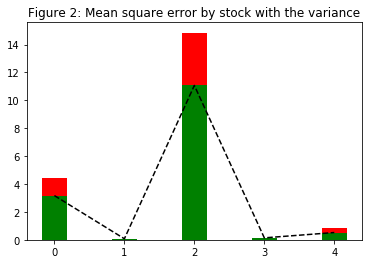

In [183]:
thresholds = np.array(listOfMeanSquares)
values = np.array(listOfVariances)
x = range(len(values))

# split it up
above_threshold = np.maximum(values - thresholds, 0)
below_threshold = np.minimum(values, thresholds)
# and plot it
fig, ax = plt.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)

plt.title("Figure 2: Mean square error by stock with the variance")

# horizontal line indicating the threshold
ax.plot(x, thresholds, "k--")

<mark style="color: red">Comment:</mark>some flaws in our linear model for certain instruments <br>


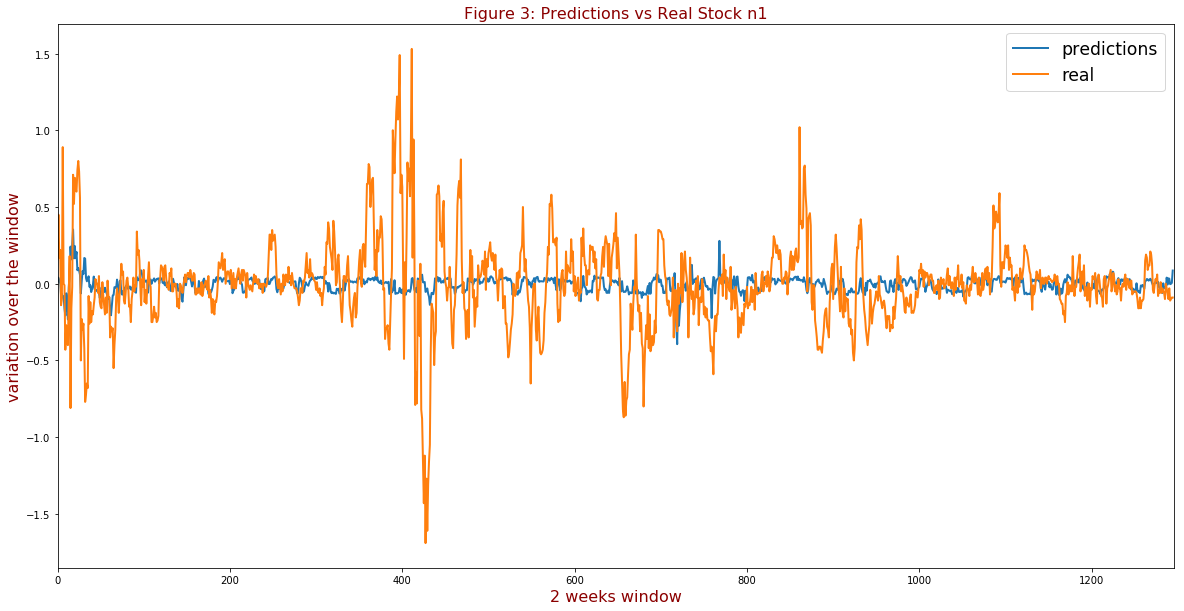

In [184]:
# handy function , parameter is just an index
def plotPredictionsVSReals(nStock):
    predictions = map(lambda x: predict(x, weights[nStock]),factor_columns)
    plt.figure(figsize=(20,10))
    plt.plot(list(predictions), lw=2)
    plt.plot(stocksReturns[nStock], lw=2)
    plt.legend(["predictions", "real"], fontsize="xx-large")
    plt.xlabel("2 weeks window", fontdict=font) 
    plt.ylabel("variation over the window", fontdict=font) 
    plt.title("Figure 3: Predictions vs Real Stock n{}".format(nStock), fontdict=font)
    plt.xlim(0, len(stocksReturns[nStock]))
    plt.show()
    
plotPredictionsVSReals(1)

<pre><mark style="color: red">Comment:</mark> <br>

<pre>

<pre><mark style="color: red">Comment:</mark> <br>
Stock that have a much high MSE have actually a wider range of variation,
Our model can't take extreme values, we're far from overfitting in th case
<pre>

# Step 2: Defining the distributions for the market conditions

# KDE: Kernel density estimation
 - A non-parametric way to estimate the probability density function of random variable.
 - a fundamental data smoothing problem
 <img src="./images/KDE.png">
 K- kernel >=0 <br>
 h- smoothing parameter-Bandwidth <br>
 K_h - Scale kernel <br>
 
 


In [185]:
def frange(x, y, jump):
  while x < y:
    yield round(x, 5)
    x += jump
    
def plotDistribution(samples, numSamples=100, plot = True):
#     return plotDistributionRDD(samples, numSamples) if isinstance(samples, RDD) else plotDistributionList(samples, numSamples=100)
    vmin = min(samples)
    vmax = max(samples)
    stddev = np.std(samples)
    
    domain = np.arange(vmin, vmax, (vmax-vmin)/numSamples)
    
    # a simple heuristic to select bandwidth
    bandwidth = 1.06 * stddev * pow(len(samples), -.2)
    
    # estimate density
    kde = KDEUnivariate(samples)
    kde.fit(bw=bandwidth)
    density = kde.evaluate(domain)
    
    # plot
    if plot ==True:
        plt.plot(domain, density)
        plt.show()
    else:
        return domain, density

def plotDistributionList(samples, numSamples=100):
    max_s = max(samples)
    min_s = min(samples)
    domain = list(frange(min_s, max_s, (max_s - min_s) / numSamples))
    densities = KernelDensity(samples).estimate(domain)
    print densities
    plt.plot(domain, densities, 'ro')
    plt.xlabel("Two Week Return ($)")
    plt.ylabel("Density")
    plt.show()

def plotDistributionRDD(samples, numSamples=100):
    stats = samples.stats()
    min_s = stats.min()
    max_s = stats.max()
    domain = list(frange(min_s, max_s, (max_s - min_s) / numSamples))
    densities = KernelDensity(samples).estimate(domain)
    plt.plot(domain, densities, 'ro')
    plt.xlabel("Two Week Return ($)")
    plt.ylabel("Density")
    plt.show()
    

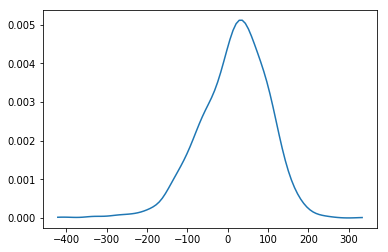

In [186]:

plotDistribution(factorsReturns[1])
# plotDistribution(factorsReturns[2])
# plotDistribution(factorsReturns[3])

## Calculate correlation between factors
The 3rd and the 4th factors are highly correlated(GSPC and IXIC)


In [187]:
correlation = np.corrcoef(factorsReturns)
correlation

array([[1.        , 0.92467051, 0.43213071, 0.39506474],
       [0.92467051, 1.        , 0.4529636 , 0.44375282],
       [0.43213071, 0.4529636 , 1.        , 0.42579391],
       [0.39506474, 0.44375282, 0.42579391, 1.        ]])

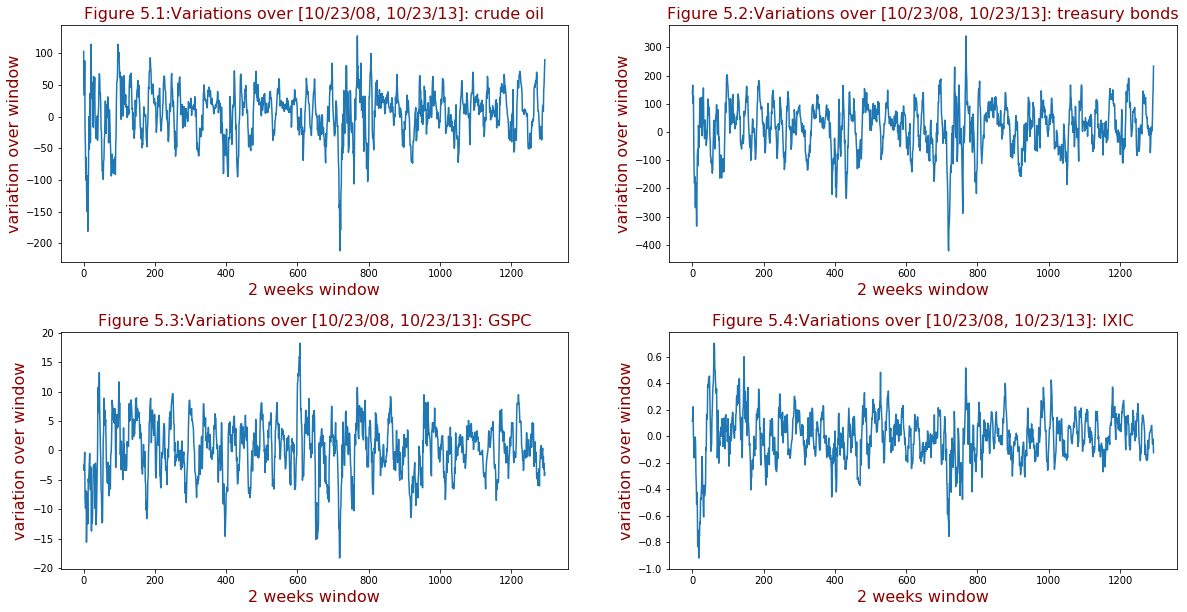

In [188]:
factorsNames = ["crude oil", "treasury bonds", "GSPC", "IXIC"] 
f, axarr = plt.subplots(2, 2)
f.set_figwidth(20)
f.set_figheight(10)
fi = 1
for (idx,factorReturns) in enumerate(factorsReturns):
    i, j = divmod(idx, 2)
    ax = axarr[i, j]
    ax.plot(factorReturns)
    ax.set_title("Figure 5.{}:Variations over [{}, {}]: {}".format(fi,start.strftime("%D"), end.strftime("%D"), factorsNames[idx])
                , fontdict=font)
    ax.set_xlabel("2 weeks window", fontdict=font) 
    ax.set_ylabel("variation over window", fontdict=font) 
    fi +=1
f.subplots_adjust(hspace=0.3)

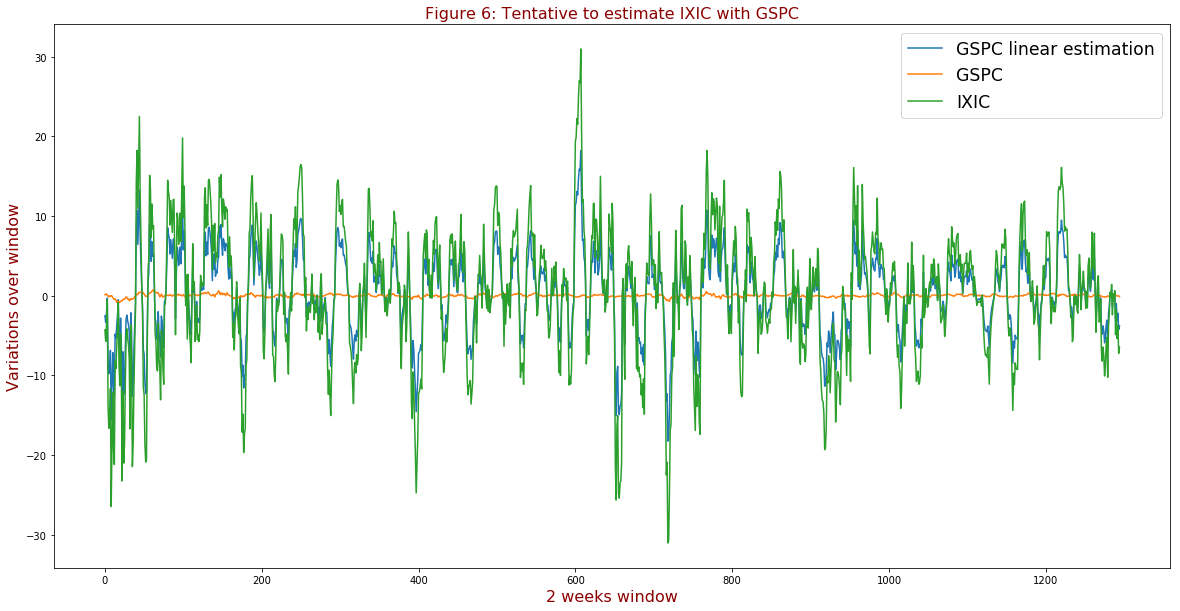

In [189]:
# plot both GSPC and IXIC in same chart to observe the similarity
# f- GSPC scaled to compared the changement with IXIC
plt.figure(figsize=(20,10))
f = [x*1.7 for x in factorsReturns[2]]
plt.plot(factorsReturns[2])
plt.plot(factorsReturns[3])
plt.plot(f)
plt.legend(["GSPC linear estimation"] + factorsNames[2:4], fontsize="xx-large")
plt.xlabel("2 weeks window", fontdict=font)
plt.ylabel("Variations over window", fontdict=font)
plt.title("Figure 6: Tentative to estimate IXIC with GSPC", fontdict=font)
plt.show() 

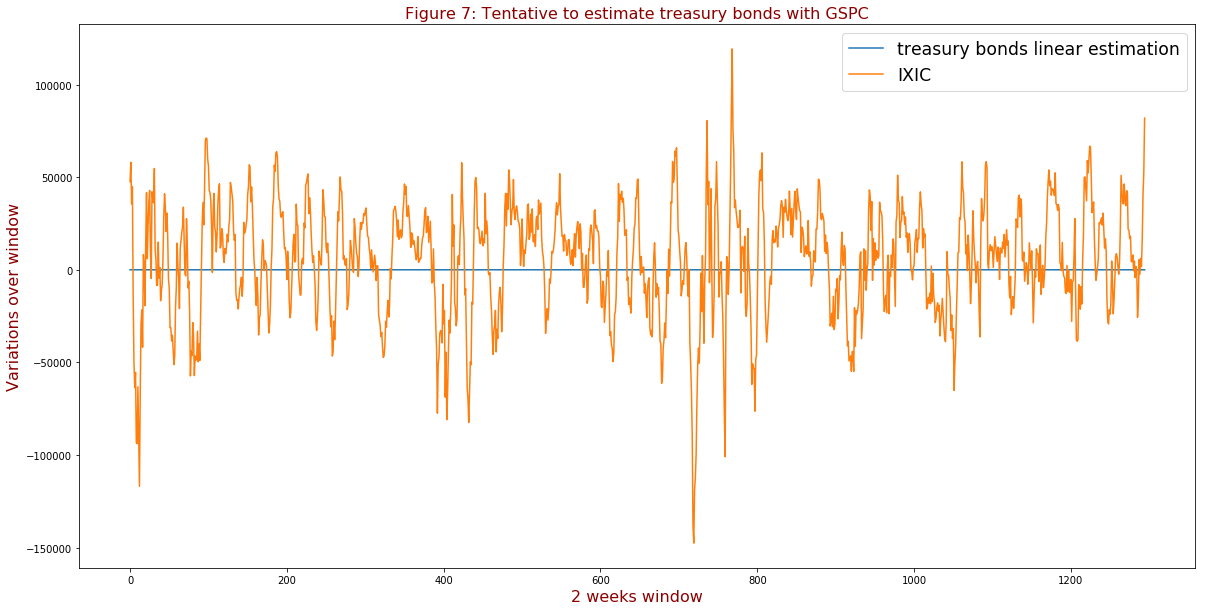

In [190]:
plt.figure(figsize=(20,10))
f = [x*350 for x in factorsReturns[1]]
plt.plot(factorsReturns[3])
plt.plot(f)
plt.legend(["treasury bonds linear estimation"] + factorsNames[3:4], fontsize="xx-large")
plt.xlabel("2 weeks window", fontdict=font)
plt.ylabel("Variations over window", fontdict=font)
plt.title("Figure 7: Tentative to estimate treasury bonds with GSPC", fontdict=font)
plt.show() 

<mark>Figure 6</mark> <br>
It shot that the 4th factor don't bring a lot of informations. If we want to improve model, we'll try to replace it or remove it.<br>
<mark>Figure 7</mark> <br>
The treasure bonds and IXIC are not corrolated at all

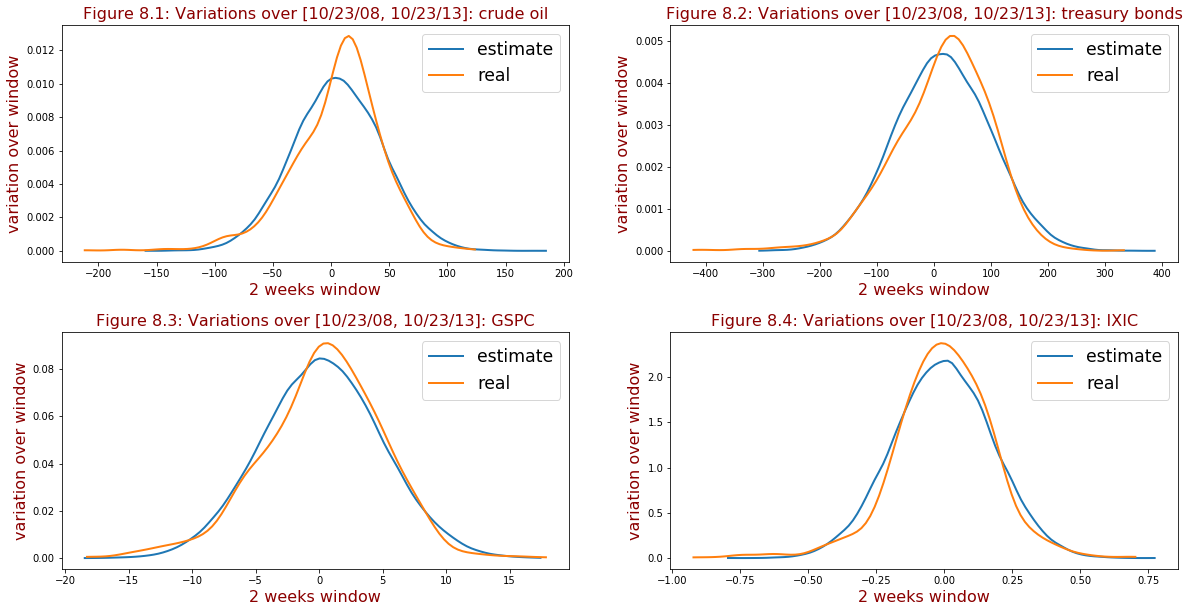

In [191]:
factorCov = np.cov(factorsReturns)
factorMeans = [sum(factorReturns)/len(factorReturns) for factorReturns in factorsReturns]
sample = np.random.multivariate_normal(factorMeans, factorCov)

factorsNames = ["crude oil", "treasury bonds", "GSPC", "IXIC"] 
    
numSamples = 50000 # to plot normal distributions
f, axarr = plt.subplots(2, 2)
f.set_figwidth(20)
f.set_figheight(10)
fi = 1
for (idx, factorReturn) in enumerate(factorsReturns):
    i, j = divmod(idx, 2)
    ax = axarr[i, j]
    normalEstimates = [np.random.multivariate_normal(factorMeans, factorCov)[idx] for k in range(numSamples)]
    domainEstimates, densityEstimates = plotDistribution(normalEstimates, plot=False)
    domainFactor, densityFactor = plotDistribution(factorReturn, plot=False)
    ax.plot(domainEstimates, densityEstimates, lw=2)
    ax.plot(domainFactor, densityFactor, lw=2)
    ax.set_title("Figure 8.{}: Variations over [{}, {}]: {}".format(fi, start.strftime("%D"), end.strftime("%D"), factorsNames[idx])
                , fontdict=font)
    ax.set_xlabel("2 weeks window", fontdict=font) 
    ax.set_ylabel("variation over window", fontdict=font) 
    ax.legend(["estimate", "real"], fontsize="xx-large")
    fi +=1
f.subplots_adjust(hspace=0.3)

In [197]:
len(stocksReturns[0])

1295

In [208]:
stocksReturnsRDD.count()

5

In [209]:
len(stocksReturnsRDD.collect()[0])

1295

In [207]:
flatstock = stocksReturnsRDD.flatMap(lambda d: d)
flatstock.count()

6475

The two first factors semm to be well fitted to the model( crude oil and trasury bounds), the two others are more flawed. It shot that we should use diffirent types of probability distributions for each factor.

# Step 3&4: Generating samples, running simulation and calculating the VaR
<pre>

</pre>


In [192]:
# from pyspark.ml.linalg import Vectors
# from pyspark.ml.regression import LinearRegression


In [230]:
def factorMatrix(histories):
    """
    convert factor histories matrix: (num_factors, num_windows) -> (num_windows, num_factors)
    """
    mat = [0] * len(histories[0])
    print len(histories)
    for (i, val) in enumerate(histories[0]):
        mat[i] = map(lambda h: h[i] , histories)
    return mat

def linearModel(instrument, factorMatrix):
    lm = LinearRegression()
    model_trained = lm.fit(factorMatrix, instrument)
        
    return model_trained

def computeFactorWeights(stocksReturns, factorFeatures):
    linear = map(lambda s: linearModel(s, factorFeatures), stocksReturns)
    return map(lambda l: list(l.coef_), linear)

def computeTrialReturns(stocksReturns, factorsReturns, sc, baseSeed, numTrials, parallelism):
    factorMat = factorMatrix(factorsReturns)
    factorCov = np.cov(factorsReturns)
    factorMeans = map(lambda factor: sum(factor)/len(factor), factorsReturns)
    factorFeatures = map(featurize,factorMat)
    factorWeights = computeFactorWeights(stocksReturns, factorFeatures)
    bInstruments = sc.broadcast(factorWeights)
    seeds = range(baseSeed, baseSeed + parallelism)
    seedRdd = sc.parallelize(seeds, parallelism)
    return seedRdd.flatMap(lambda s: trialReturns(s, numTrials / parallelism, bInstruments.value, factorMeans, factorCov))

def trialReturns(seed, numTrials, instruments, factorMeans, factorCovariances):
    np.random.seed(seed)
    trialReturns = [0] * numTrials
    for i in range(0, numTrials):
        trialFactorReturns = np.random.multivariate_normal(factorMeans,factorCovariances)
        trialFeatures = featurize(list(trialFactorReturns))
        trialReturns[i] = trialReturn(trialFeatures, instruments)
    return trialReturns

def trialReturn(trial, instruments):
    totalReturn = 0.0
    for instrument in instruments:
        totalReturn += instrumentTrialReturn(instrument, trial)
    return totalReturn / len(instruments)

def instrumentTrialReturn(instrument, trial):
    instrumentTrialReturn = instrument[0]
    i = 0
    while (i < len(trial)):
        instrumentTrialReturn += trial[i] * instrument[i]
        i += 1
    return instrumentTrialReturn

def fivePercentVaR(trials):
    topLosses = trials.takeOrdered(max(trials.count() / 20, 1))
    return topLosses[-1]

def fivePercentCVaR(trials):
    topLosses = trials.takeOrdered(max(trials.count() / 20, 1))
    return sum(topLosses) / len(topLosses)

def bootstrappedConfidenceInterval(trials, computeStatistic, numResamples, pValue):
    stats = sorted(map(lambda i: computeStatistic(trials.sample(True, 1.0)), range(0,numResamples)))
    lowerIndex = int(numResamples * pValue / 2 - 1)
    upperIndex = int(math.ceil(numResamples * (1 - pValue / 2)))
    return (stats[lowerIndex], stats[upperIndex])

def countFailures(stocksReturns, valueAtRisk):
    failures = 0
    for i in range(0, len(stocksReturns[0])):
        loss = sum(map(lambda x: x[i], stocksReturns))
        if(loss < valueAtRisk):
            failures += 1
    return failures

def kupiecTestStatistic(total, failures, confidenceLevel):
    failureRatio = float(failures)/ total
    logNumer = (total - failures) * math.log1p(-confidenceLevel) * failures * math.log(confidenceLevel)
    logDenom = (total - failures) * math.log1p(-failureRatio) + failures * math.log(failureRatio)
    return -2 * (logNumer - logDenom)

def kupiecTestPValue(stocksReturns, valueAtRisk, confidenceLevel):
    failures = countFailures(stocksReturns, valueAtRisk)
    total = len(stocksReturns[0])
    testStatistic = kupiecTestStatistic(total, failures, confidenceLevel)
    return 1 - stats.chi2.cdf(testStatistic, 1)


Compute Trial returns
4
VaR 5%: -0.5587696728504042
CVaR 5%: -0.5587696728504042
VaR confidence interval: (-0.5587696728504042, -0.3539659637364329)
CVaR confidence interval: (-0.5587696728504042, 0.1589029123993282)
Kupiec test p-value: 1.0


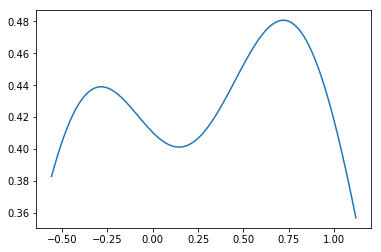

In [231]:
numTrials = 10
parallelism = 1
baseSeed = 1001L
print('Compute Trial returns')
trials = computeTrialReturns(stocksReturns, factorsReturns, sc, baseSeed, numTrials,parallelism)
trials.cache()
valueAtRisk = fivePercentVaR(trials)
conditionalValueAtRisk = fivePercentCVaR(trials)
print("VaR 5%: " + str(valueAtRisk))
print("CVaR 5%: " + str(conditionalValueAtRisk))
varConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentVaR, 100, 0.05)
cvarConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentCVaR, 100, 0.05)
print("VaR confidence interval: " + str(varConfidenceInterval))
print("CVaR confidence interval: " + str(cvarConfidenceInterval))
print("Kupiec test p-value: " + str(kupiecTestPValue(stocksReturns, valueAtRisk, 0.05)))
plotDistribution(trials.collect())

In [217]:
facmat = factorMatrix(factorsReturns)
factorFeatures = map(featurize,facmat)
factorWeights = computeFactorWeights(stocksReturns, factorFeatures)

4


ValueError: Params must be either a param map or a list/tuple of param maps, but got <type 'float'>.

In [ ]:
print(len(factorWeights))
print(len(factorWeights[1]))

In [228]:
len(factorsReturns[0])

1295

In [ ]:
len(factorFeatures[0])

In [ ]:
len(stocksReturns)

In [ ]:
trials.collect()